#  Naive Bayes — From Scratch

In this notebook, we implement the **Gaussian Naive Bayes** algorithm from scratch using only **NumPy**.

### We will:
- Generate a synthetic dataset  
- Compute class priors  
- Compute per-class mean & variance  
- Implement the Gaussian probability density function  
- Compute log-likelihood for each class  
- Make predictions  
- Visualize class separation  
- Evaluate model accuracy  




##  What is Naive Bayes?

Naive Bayes is a **probabilistic classifier** based on **Bayes’ Theorem**.  
It predicts the class with the highest posterior probability.

The classifier is called *“naive”* because it assumes that **all features are conditionally independent** given the class label — which simplifies computations dramatically.

The core equation of Bayes’ Theorem is:

$$
P(y|x) \propto P(x|y) \, P(y)
$$

Where:

- $P(y|x)$ → **Posterior**: probability of class $y$ given features $x$  
- $P(x|y)$ → **Likelihood**: probability of observing features $x$ when the class is $y$  
- $P(y)$ → **Prior**: the base probability of class $y$  
- $\propto$ → “proportional to”, because $P(x)$ is constant for all classes  

In Gaussian Naive Bayes, the likelihood $P(x|y)$ is modeled using the **Gaussian (normal) distribution** for each feature.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## 1. Generate 2-class dataset

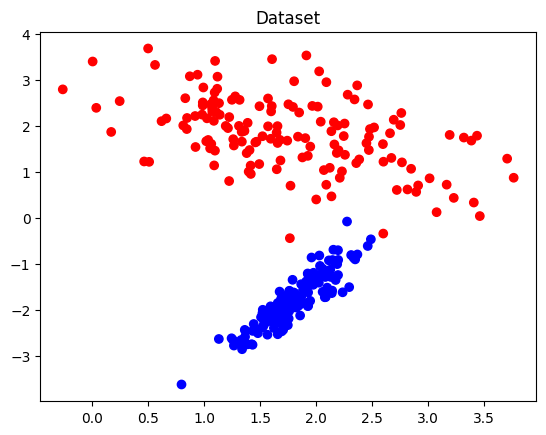

In [3]:
np.random.seed(42)

X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.8
)

y = y.reshape(-1, 1)

plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="bwr")
plt.title("Dataset")
plt.show()

## 2. Naive Bayes Functions

In [4]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y.ravel() == c]
            
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-8
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def gaussian_pdf(self, x, mean, var):
        numerator = np.exp(- (x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        predictions = []

        for x in X:
            posteriors = []

            for c in self.classes:
                prior = np.log(self.priors[c])
                class_conditional = np.sum(
                    np.log(self.gaussian_pdf(x, self.mean[c], self.var[c]))
                )
                posterior = prior + class_conditional
                posteriors.append(posterior)

            predictions.append(np.argmax(posteriors))
        
        return np.array(predictions).reshape(-1, 1)


# 3. Train Model

In [6]:
nb = NaiveBayes()
nb.fit(X, y)
y_pred = nb.predict(X)

print("Accuracy:", np.mean(y_pred == y))


Accuracy: 0.9933333333333333


## 4. Decision Boundary Visualization

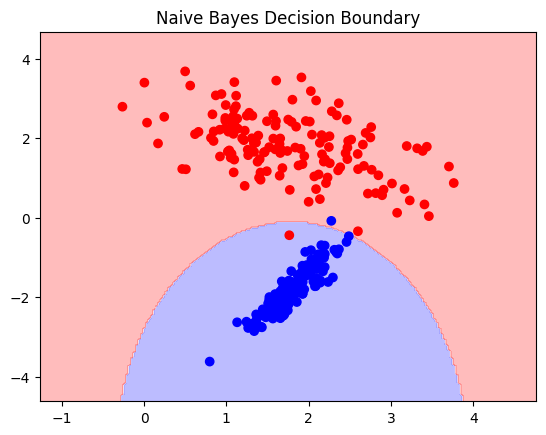

In [7]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
zz = nb.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap="bwr", alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="bwr")
plt.title("Naive Bayes Decision Boundary")
plt.show()


##  Decision Boundary Analysis and Model Evaluation

**Accuracy:** 0.9933  

The Gaussian Naive Bayes classifier performs extremely well on this dataset.  
Because each class is modeled using a Gaussian distribution, the resulting decision boundary is **smooth and curved**, not linear.

- The blue region represents points where the model assigns higher probability to class 0  
- The red region represents higher probability for class 1  
- The curved separation reflects differences in class means and variances  
- The boundary forms naturally from comparing the log-likelihood of each class

Overall, the model fits the data distribution accurately and produces a clear, well-defined separation between the two classes.
